

| Función de activación | Ventajas | Desventajas |
| --------------------- | -------- | ----------- |
| Lineal | Simple y rápida de calcular | Le falta introducir no linealidad, no limita el rango de salida |
| Sigmoide | Mapea la salida al rango (0, 1), útil para clasificación binaria | Se satura fácilmente, tiene gradientes pequeños, no tiene media cero |
| Tangente hiperbólica | Mapea la salida al rango (-1, 1), tiene media cero, es más fuerte que la sigmoide | Se satura fácilmente, tiene gradientes pequeños |
| ReLU | Introduce no linealidad, tiene gradientes grandes, es rápida de calcular | Puede morir si la entrada es negativa, no tiene media cero |


# Keras: https://keras.io/api/layers/activations/

Keras es una bilbioteca con librerias de código abierto para entrenar modelos de deep learning DL que puede ejecutarse en TensorFlow. Keras permite construir bloque de arquitectura de la redes neuronales, y permite construir desde un perceptron hasta redes neuronales convolucionales  y recurrentes de una manera amigable con el usuario.


# Funciones de activación

Tipos de funciones de activación:

## Lineal:

Una transformación lineal, la cual se muestra en la siguiente figura, consiste básicamente, en la función identidad. En estra transformación, la variable dependiente tiene una relación directa y proporcional con la variable independiente. En términos prácticos, lo anterior significa que una función de activación lineal pasa la señal sin realizar un cambio sobre esta. Este el típo de activación que se usa en la capa de entrada de las redes neuronales.


## Sigmoide:
Como todas las transformaciones logísticas, las sigmoides puede reducir la cantidad de valores extremos o outliers en los datos sin eliminarlos. En la siguiente figura se ilustra dicha función sigmoide:

Una función sigmoide convierde una variable independiente de rango infinito en probabilidades con un rango entre 0 y 1. La mayoria de las salidas serán cercanas a 0 o 1, que corresponden a zonas de saturación.

La función de activación sigmoide devuelve una probabilidad independiente para cada clase.



##  Tanh
Corresponde a una función trigonométrica hiperbólica donde el rango de salida de tanh varía entre -1 y 1, note la diferencia con la función sigmoide. La ventaja de tanh es puede tratar los números negativos de forma más eficiente que la función sigmoide.


## ReLU: Rectified Linear Unit (Unidad Rectificadad Lineal)
La unidad rectificada lineal es una trasformación más intersante que activa un nodo solo si la entrada se encuentra por encima de cierta cantidad. Si la entrada está por debajo de zero, la salida es cero, pero si la entrada alcanza un valor umbral, la salida tiene una relación lineal con la variable dependiente.

Las funciones de activaciones ReLU representan actualmente el estado de arte en la aplicación de funciones de activación, ya que han demostrado un buen desempeño en diferentes situaciones. Dado que el gradiente de la ReLU es cero o constante, permite evitar el problema del desvanecimiento del gradiente. Las funciones de activación ReLu han demostrado un mejor entrenamiento en la práctica que las funciones de activación sigmoidea.

Las funciones de activación ReLU se usan, normalmente, en las capas ocultas.

Existen mas funciones de activación, no obstante, nos centraremos a continuación solo en una más. Esta función de activación es usada en la capa de salida de la clasificación multiclase mediante una red neuronal. Es conocida como Softmax.


## Softmax
La función de activación Softmax representa una generalización de la regresión logística en el sentido que puede ser apllicada a un conjunto continuos de datos (en lugar de una clasificación binaria) y puede contener múltiples fronteras de desición. Esta función maneja sistemas multinomiales para el etiquetado. Softmax es una función que normalmente se usa en la capa de salida de un clasificador.

La función de activación Softmax devuelve la distribución de probablilidades de clases mutuamente excluyentes.

Consideremos el siguiente ejemplo en donde se ilustra, entre otra cosas la definición de la función SoftMax:

$S(y_i)=\frac{e^y_i}{\sum e^{y_i}}$


En deep learning, el térno capa logit se usa para la última capa de neuronas de la red neuronal para el problema de clasificación que produce unos valores de predicción "crudos" de valores reales que varian en el intervalo . En concreto, las cantidades logits son los puntajes crudos de la ultima capa de la red neuronal, antes de que se les aplique la activación.


Ref: https://github.com/ssanchezgoe/curso_deep_learning_economia/blob/main/NBs_Google_Colab/DL_S07_Funciones_Activacion_Arquitectura_Red.ipynb

# Arquitectura y funcionalidad de la Redes neuronales secuenciales:

De las funciones de activación habladas en la clase anterior podemos advertir dos características que deben poseer una red neuronal:

Las funciones de activación de las capas ocultas deben ser funciones de activación no lineales, con el fín de que la red actue como un aproximador universal a una función.

La función de activación de la capa de salida determina el tipo de clasificación/regresión del problema que se pretende solucionar.
Como regla general, se tiene que la función de activación de las capas ocultas puede ser definida como una función ReLU y, dependiendo del problema, podemos definir la función de activación de la capa de salida como:

- Función de activación sigmoide: si el problema de clasificación es binario.
- Función de activación Softmax: si el problema de clasificación es multiclase.
- Función de activación lineal: si el problema se trata de una regresión.

En resumen, en la siguiente figura se ilustran la arquitectura de red de los problemas que pueden presentarse en la clasificación/regresión usando una red neuronal secuencial y las funciones de activación definidas en las capas que la componen.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score
from sklearn.datasets import load_digits
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense

# Punto 1

Para el dataset make a moon de sklearn, construir un modelo de una red neuronal con keras para clasificar los datos.


In [ ]:
#  Libraries for draw contours
def make_meshgrid(x, y, h=0.02):
    """Crear una malla de puntos para trazar la frontera de decisión

    Parámetros
    ----------
    x: datos en los que se basa la malla del eje x
    y: datos en los que se basa la malla del eje y
    h: tamaño de la malla, opcional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Trazar los límites de decisión para un clasificador.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: un clasificador
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: diccionario de parámetros para pasar a contourf, opcional
    """
    X_grid = np.c_[xx.ravel(), yy.ravel()]    # Aplanamos la malla para aplicar el modelo
    Z = clf.predict(X_grid)
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

**Métrica de entropía cruzada binaria:**

Comúnmente utilizada en problemas de clasificación binaria en aprendizaje profundo.

Mide la diferencia entre la distribución de las probabilidades predichas por el modelo y las etiquetas reales.

$$B_{crossentropy} = -\frac{1}{N} \sum_i^N [y_i log(\hat{y}_i) + (1-y_i) log(1-\hat{y}_i)]$$

* $y_i$: Etqiueta real (0 o 1) de la muestra $i$.

* $\hat{y}_i$: Probabilidad predicha para la clase positiva (1).

\
**interpretación:**

* Si $y_i=1$, la función minimiza la diferencia entre $\hat{y}_i$ y 1, y maximiza el $log(\hat{y}_i)$. Esto es, si la probabilida predicha es cercana a 1, al pérdida será baja.

* Si $y_i=0$, la función minimiza la diferencia entre $\hat{y}_i$ y 0, y maximiza el $log(1-\hat{y}_i)$. Esto es, si la probabilida predicha es cercana a 0, al pérdida será baja.

* Si la predicción es incorrecta (por ejemplo, predice 0.9 cuando debería ser 0), la pérdida será alta.


\
Se usa cuando la salida es una probabilidad entre 0 y 1, usando una activación `'sigmoid'` por ejemplo en la capa final.



In [2]:
''' Construcción de red secuencial para clasificación binaria '''

def red_secuencial_binaria(fact_in, fact_out='sigmoid', learning_rate=0.01):
  # Topología
  model = tf.keras.models.Sequential()
  model.add(Dense(4, input_shape=(2,), activation=fact_in))
  # model.add(Dense(4, input_dim=2, activation=fact_in))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(6, activation='relu'))
  model.add(Dense(1, activation=fact_out))

  # Optimizador
  # opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

  return model
# ------------------------------------------------------------------------------

def validacion(model, Xtrain, Xtest, Ytrain, Ytest, ne):
  tf.keras.backend.clear_session()    # Limpieza de la sesión que se abre con Keras

  # parada_temprana = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

  # historial = model.fit(Xtrain, Ytrain, validation_data=(Xtest, Ytest), epochs=ne, verbose=1, callbacks=[parada_temprana])
  historial = model.fit(Xtrain, Ytrain, validation_data=(Xtest, Ytest), epochs=ne, verbose=1)

  y_pred = model.predict(Xtest)
  mae = mean_absolute_error(Ytest, y_pred)
  r2 = r2_score(Ytest,y_pred)

  print('\n---------------------- Evaluación del modelo ----------------------')
  _, train_acc = model.evaluate(Xtrain, Ytrain, verbose=0)
  _, test_acc = model.evaluate(Xtest, Ytest, verbose=0)
  print('Exactitud: Entrenamiento: %.3f, Prueba: %.3f' %(train_acc, test_acc))
  print(f"Error absoluto medio (MAE): {mae:.6f}")
  print(f"Coeficiente de determinación (R²): {r2:.6f} \n")

  fig = plt.figure(figsize=(12,6))

  plt.subplot(1,2,1)
  plt.plot(historial.history["loss"],label="Pérdida en Entrenamiento")
  plt.plot(historial.history["val_loss"],label="Pérdida en Validación")
  plt.title("Curvas de Entropía Cruzada")
  plt.xlabel("Épocas")
  plt.ylabel("Pérdida")
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(historial.history["accuracy"],label="Exactitud en Entrenamiento")
  plt.plot(historial.history["val_accuracy"],label="Exactitud en Validación")
  plt.title("Curvas de desempeño:")
  plt.xlabel("Épocas")
  plt.ylabel("Exactitud")
  plt.legend()

  fig.tight_layout()

  return y_pred

### Capa de entrada con activación `'relu'`

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6434 - loss: 0.6726 - val_accuracy: 0.6900 - val_loss: 0.6601
Epoch 2/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6750 - loss: 0.6566 - val_accuracy: 0.6850 - val_loss: 0.6471
Epoch 3/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6593 - loss: 0.6451 - val_accuracy: 0.6850 - val_loss: 0.6343
Epoch 4/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6891 - loss: 0.6357 - val_accuracy: 0.7100 - val_loss: 0.6217
Epoch 5/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7240 - loss: 0.6226 - val_accuracy: 0.8050 - val_loss: 0.6094
Epoch 6/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7497 - loss: 0.6103 - val_accuracy: 0.8300 - val_loss: 0.5969
Epoch 7/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8149 - loss: 0.5998 - val_accuracy: 0.8500 - val_loss: 0.5840
Epoch 8/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8157 - loss: 0.5859 - val_accuracy: 0.8500 - 

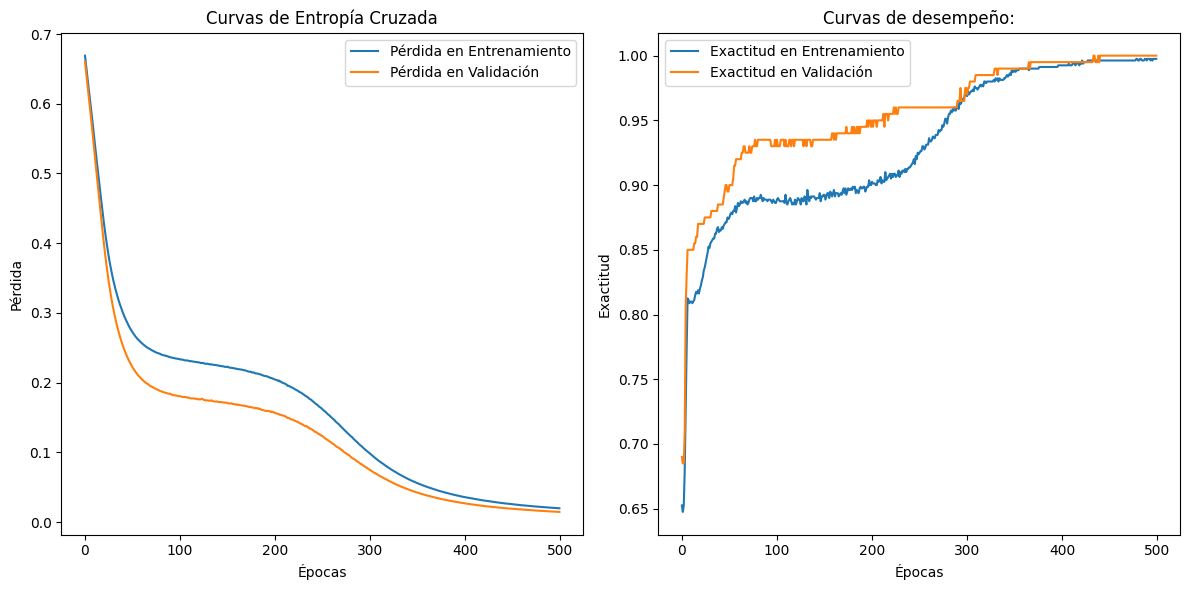

In [4]:
# dataset
X, y = make_moons(n_samples=1000, noise=0.1, shuffle=True, random_state=42)

# Estratificación aleatoria respetando proporción de clases
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(X, y):
  X_train, y_train = X[train_index], y[train_index]     # Entrenamiento (80%)
  X_test, y_test = X[test_index], y[test_index]         # Prueba (20%)

# Entrenamiento y validación del modelo
epochs = 500
learning_rate = 0.01
model_relu = red_secuencial_binaria('relu', 'sigmoid', learning_rate)
y_pred_test = validacion(model_relu, X_train, X_test, y_train, y_test, epochs)

En este caso vemos que las curvas de pérdida tienen una buena convergencia, al igual que las de exactitud, sin embargo, posiblemente hay un sobreajuste pues la métrica de exactitud con los datos de entrenamiento es exactamente 1, mayor que la de entrenamiento.

### Capa de entrada con activación `'linear'`

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/600
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4985 - loss: 0.7035 - val_accuracy: 0.5000 - val_loss: 0.6902
Epoch 2/600
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4936 - loss: 0.6885 - val_accuracy: 0.5000 - val_loss: 0.6770
Epoch 3/600
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5002 - loss: 0.6759 - val_accuracy: 0.4950 - val_loss: 0.6647
Epoch 4/600
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4995 - loss: 0.6649 - val_accuracy: 0.4950 - val_loss: 0.6532
Epoch 5/600
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4867 - loss: 0.6543 - val_accuracy: 0.4900 - val_loss: 0.6428
Epoch 6/600
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5266 - loss: 0.6367 - val_accuracy: 0.4900 - val_loss: 0.6333
Epoch 7/600
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4707 - loss: 0.6398 - val_accuracy: 0.4900 - val_loss: 0.6245
Epoch 8/600
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4905 - loss: 0.6370 - val_accuracy: 0.5550 - 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

---------------------- Evaluación del modelo ----------------------
Exactitud: Entrenamiento: 0.980, Prueba: 0.975
Error absoluto medio (MAE): 0.067129
Coeficiente de determinación (R²): 0.930172 



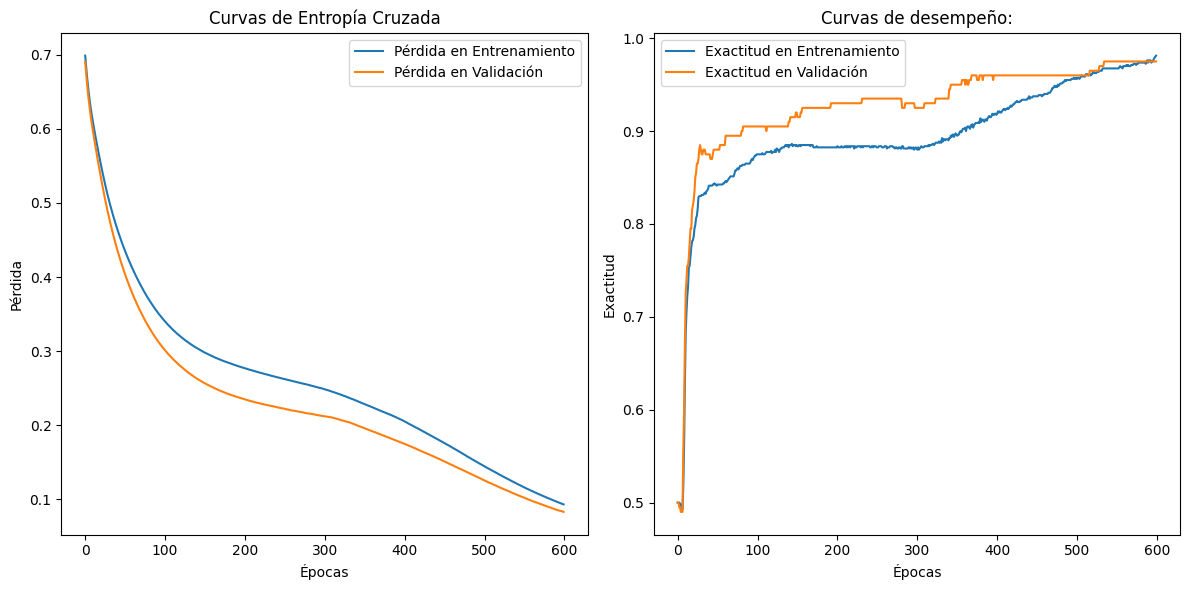

In [6]:
# Entrenamiento y validación del modelo
epochs = 600
learning_rate = 0.005
model_lineal = red_secuencial_binaria('relu', 'sigmoid', learning_rate)
y_pred_test = validacion(model_lineal, X_train, X_test, y_train, y_test, epochs)

En este modelo obtenemos un muy buen ajuste, las curvas de pérdida para entrenamiento y prueba convergen suave y gradualmente, y se logra una buena exactitud.

No parece haber indicios de sobreajuste, pues el error cuadrático medio es suficientemente pequeño y las métricas no son exactamente 1, sino un valor muy cercano.

# Punto 2

Para el dataset load digits, construir un modelo de red neuronal empleando keras para realizar la clasificación.

**Nota:** Como es un problema de multiclasficación utilizamos una activación de salida de tipo `'softmax'`.

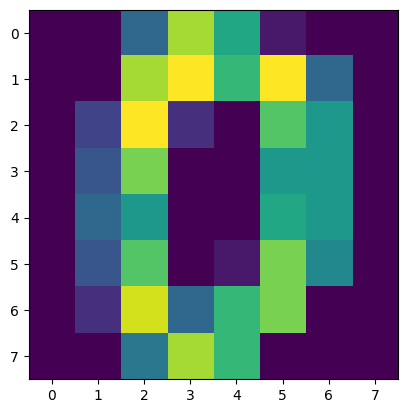

In [3]:
digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape

# Mostrar uno de los dígitos
plt.imshow(X[0].reshape(8, 8))

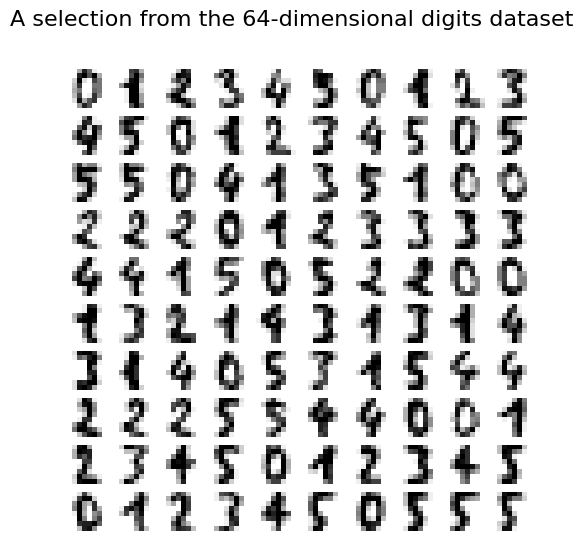

In [8]:
# Mostrar una parte del dataset
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")

_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

# PROBAR stratified
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=6)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=6)

In [12]:
''' Problema de multiclasificación '''

def red_secuencial_multiclasif(fin, fout='softmax', learning_rate=0.01):
  # Topología
  model = tf.keras.models.Sequential()
  #model.add(Dense(8, input_shape(64,), activation=fin))
  model.add(Dense(8, input_dim=64, activation=fin))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(6, activation=fout))

  # Optimizador
  # opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

  return model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1199 - loss: 3.3184 - val_accuracy: 0.0691 - val_loss: 2.5227
Epoch 2/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0704 - loss: 2.3634 - val_accuracy: 0.1106 - val_loss: 2.2027
Epoch 3/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1052 - loss: 2.1090 - val_accuracy: 0.1475 - val_loss: 2.0287
Epoch 4/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1676 - loss: 1.9358 - val_accuracy: 0.1659 - val_loss: 1.9075
Epoch 5/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2075 - loss: 1.8483 - val_accuracy: 0.1889 - val_loss: 1.8286
Epoch 6/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2092 - loss: 1.8131 - val_accuracy: 0.2258 - val_loss: 1.7689
Epoch 7/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2366 - loss: 1.7401 - val_accuracy: 0.2166 - val_loss: 1.7228
Epoch 8/600
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2135 - loss: 1.7328 - val_accuracy: 0.2949 - 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

---------------------- Evaluación del modelo ----------------------
Exactitud: Entrenamiento: 0.961, Prueba: 0.931
Error absoluto medio (MAE): 0.028932
Coeficiente de determinación (R²): 0.894590 



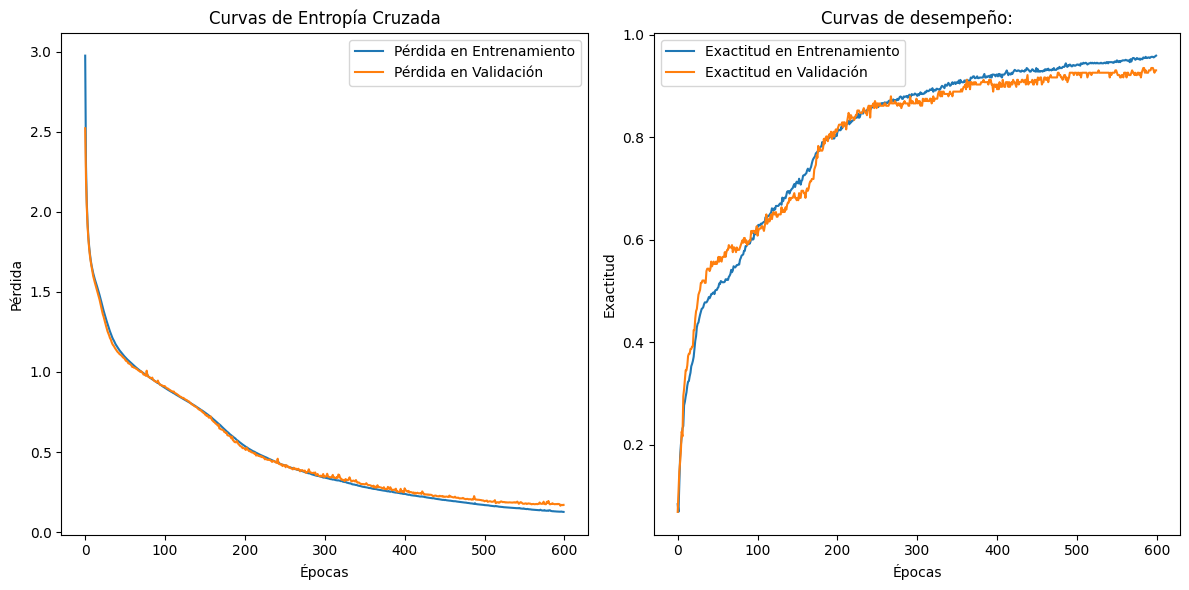

In [13]:
tf.keras.backend.clear_session()    # Limpieza de la sesión que se abre con Keras
epochs = 600
learning_rate = 0.0008
model_soft = red_secuencial_multiclasif('relu', 'softmax', learning_rate)
y_pred_soft = validacion(model_soft, X_train, X_test, y_train, y_test, epochs)

Se logra una buena exactitud, la pérdida en entrenamiento se comporta bien y de manera estable, pero la pérdida en validación parece fluctuar cerca de la curva de entrenamiento. En las últimas épocas esta parece separarse un poco de la pérdida en entrenamiento, por lo que el modelo puede exhibir sobreajuste.